In [15]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Generate some dummy data with anomalies
rng = np.random.RandomState(42)
X = 0.3 * rng.randn(100, 2)
X_outliers = rng.uniform(low=-4, high=4, size=(20, 2))
X = np.concatenate([X, X_outliers], axis=0)

In [17]:
# Create a dataframe
df = pd.DataFrame(X, columns=['feature_1', 'feature_2'])
df.head()

,feature_1,feature_2
0,0.149014,-0.041479
1,0.194307,0.456909
2,-0.070246,-0.070241
3,0.473764,0.230230
4,-0.140842,0.162768


In [18]:
# Fit Isolation Forest model
model = IsolationForest(n_estimators=100, random_state=42, contamination=0.17)
model.fit(df)

IsolationForest(contamination=0.17, random_state=42)

In [19]:
# Get the anomaly scores
scores = model.decision_function(df)

array([ 0.06510501,  0.04552297,  0.07944756,  0.0154497 ,  0.0697235 ,
        0.06938521,  0.00975618,  0.02918563,  0.06920178,  0.03866863,
        0.02609587,  0.0556509 ,  0.0723452 ,  0.06434546,  0.07510664,
        0.02243381,  0.06438264,  0.04608415,  0.00820207,  0.06900133,
        0.07041644,  0.08166635,  0.04703588,  0.06168276,  0.02124478,
        0.0766492 ,  0.06907551,  0.04970497,  0.07001001,  0.06658694,
        0.07117017,  0.0426521 ,  0.04289141,  0.06868894,  0.0687659 ,
        0.04941484,  0.04614388, -0.02884063,  0.08019936,  0.00423664,
        0.07951854,  0.02083694,  0.06776262,  0.06621393,  0.07092129,
        0.06832877,  0.07059702,  0.046272  ,  0.08493334,  0.07889357,
        0.05863509,  0.07176461,  0.07580824, -0.00109002,  0.076624  ,
        0.01319913,  0.01525233,  0.08272082,  0.06191945,  0.04787069,
        0.05257884,  0.0036492 ,  0.0199386 ,  0.06482239,  0.07631226,
        0.04348161,  0.0656914 ,  0.03432892,  0.07057137,  0.04

In [8]:
# Get the anomaly prediction (1 for normal, -1 for anomaly)
predictions = model.predict(df)

In [9]:
# Add predictions to the DataFrame
df['anomaly_score'] = scores
df['is_anomaly'] = predictions

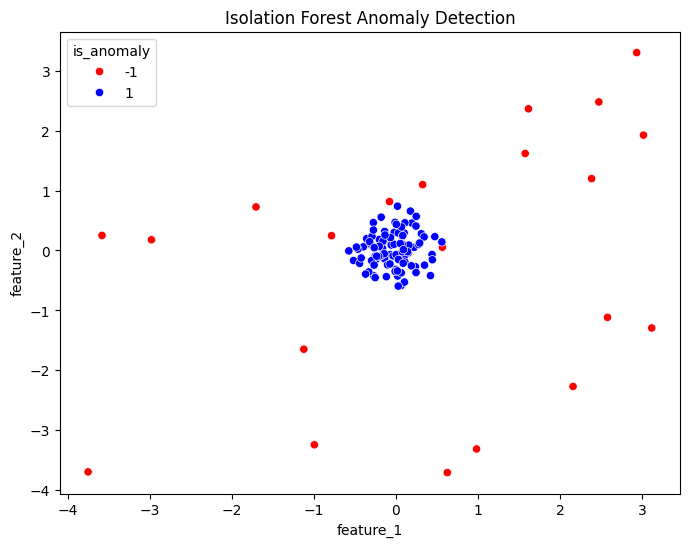

In [10]:
# Visualize results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='feature_1', y='feature_2', hue='is_anomaly', data=df, palette={1:'blue', -1:'red'})
plt.title('Isolation Forest Anomaly Detection')
plt.show()

In [11]:
# Print anomaly counts
print(df.is_anomaly.value_counts())

is_anomaly
 1    99
-1    21
Name: count, dtype: int64


## Hyperparameter tuning

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import IsolationForest

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_samples': ['auto', 0.5, 0.8],
    'contamination': [0.10, 0.15, 0.20]
}

# Create Isolation Forest model
iso_forest = IsolationForest(random_state=42)

# Set up grid search
grid_search = GridSearchCV(estimator=iso_forest, param_grid=param_grid, cv=3, scoring='neg_mean_absolute_error')

# Fit the grid search
grid_search.fit(df[['feature_1', 'feature_2']])

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

D:\Users\delhi\miniconda3\envs\rl\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Users\delhi\miniconda3\envs\rl\lib\site-packages\sklearn\model_selection\_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
D:\Users\delhi\miniconda3\envs\rl\lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "D:\Users\delhi\miniconda3\envs\rl\lib\site-packages\sklearn\model_selection\_validation.py", line 947, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: __call__() missing 1 required positional argumen

Best parameters found:  {'contamination': 0.1, 'max_samples': 'auto', 'n_estimators': 50}


In [23]:
grid_search.predict(df)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
       -1, -1, -1,  1,  1,  1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1, -1,
        1])

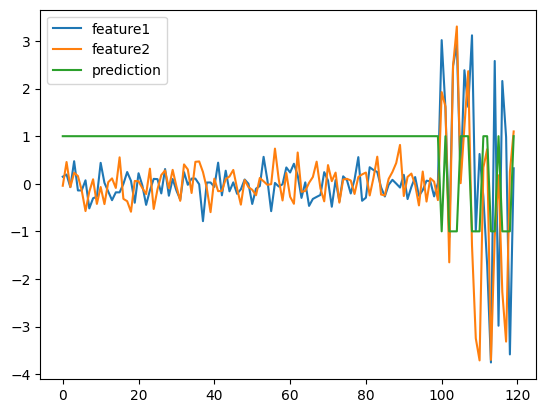

In [34]:
plt.plot(df)
plt.plot(grid_search.predict(df))
plt.legend(['feature1','feature2','prediction'])